# Homework 01 Data Pre-processing

#### Loading the Diabetes Dataset

In [20]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer

#Load the Diabetes dataset
dataset = load_breast_cancer()


#### Exploring the Dataset

In [21]:
x_full, y_full = dataset.data, dataset.target

#Access the feature names
feature_names = dataset.feature_names

# Define the target variable name
target = dataset.target
target_name = dataset.target_names

# Print the name of the target variable
print("target_names")
print(target_name)
# Print the feature names
print("Feature Names:")
print(feature_names)

target_names
['malignant' 'benign']
Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### Selecting Features

In [22]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Get descriptive statistics
X.describe().T   

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Considering the above results mean area and worst area are selected as the two features for further preprocessing.

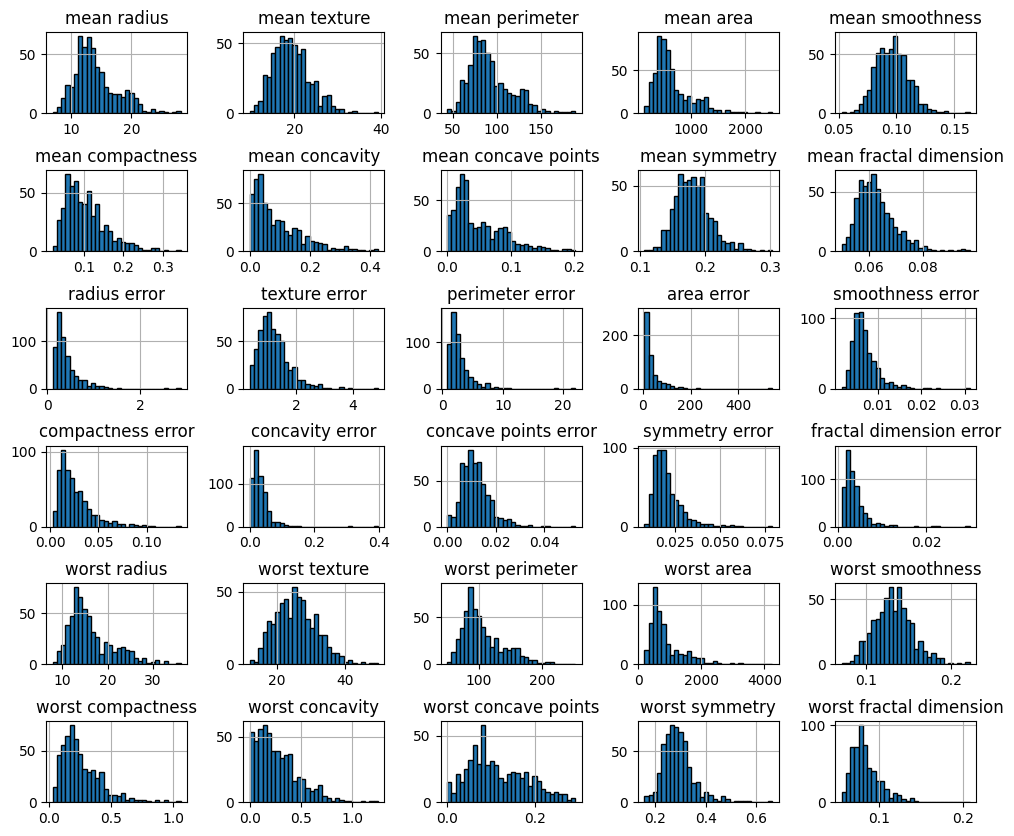

In [23]:
X.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

#### Applying Different Data Normalization Methods

##### Min-Max Scaling

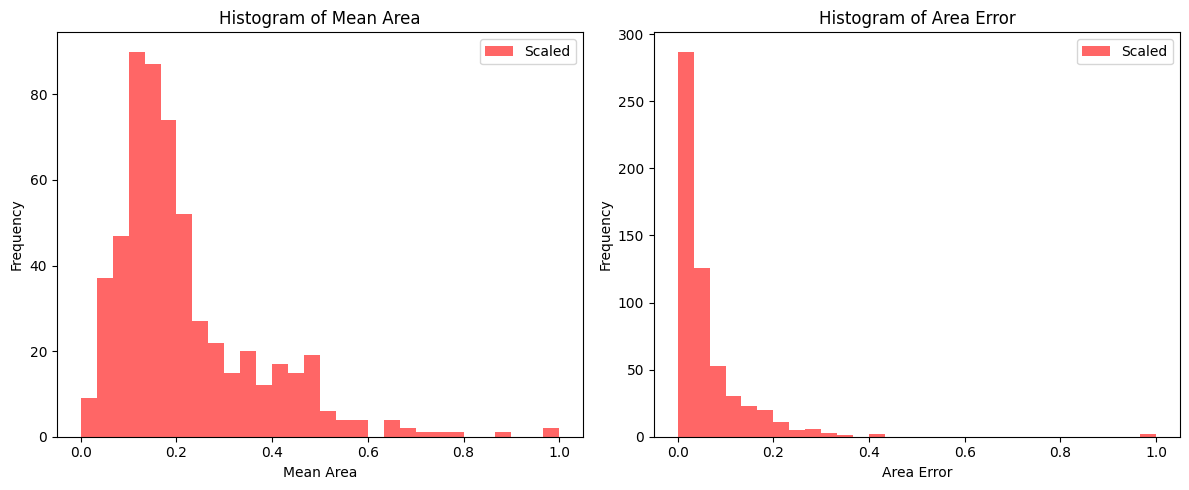

In [24]:
# selected features
features_selected = X[['mean area', 'area error']]

# 1. Min-Max Scaling
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(features_selected)

# Correct DataFrame creation
X_minmax = pd.DataFrame(X_minmax, columns=['mean area', 'area error'])

# Plot histograms
plt.figure(figsize=(12,5))

# Histogram of Mean Area
plt.subplot(1, 2, 1)
plt.hist(X_minmax['mean area'], bins=30, alpha=0.6, label='Scaled', color='red')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Area')
plt.legend()

# Histogram of Area Error
plt.subplot(1, 2, 2)
plt.hist(X_minmax['area error'], bins=30, alpha=0.6, label='Scaled', color='red')
plt.xlabel('Area Error')
plt.ylabel('Frequency')
plt.title('Histogram of Area Error')
plt.legend()

plt.tight_layout()
plt.show()


##### Standard Scaling

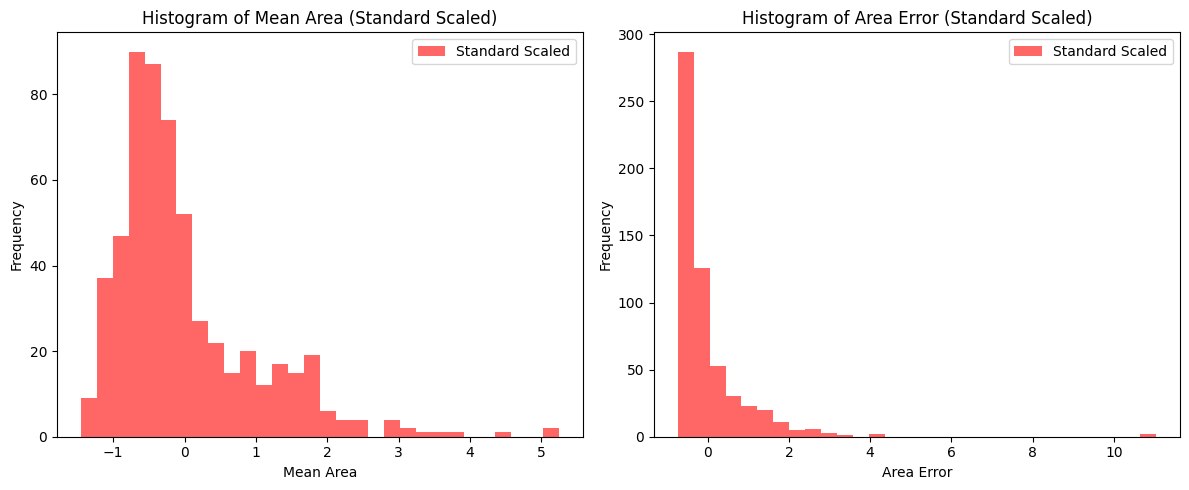

In [25]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Suppose these are the selected features
features_selected = X[['mean area', 'area error']]

# 2. Standard Scaling
scaler = StandardScaler()
X_standard = scaler.fit_transform(features_selected)

# Correct DataFrame creation
X_standard = pd.DataFrame(X_standard, columns=['mean area', 'area error'])

# Plot histograms
plt.figure(figsize=(12,5))

# Histogram of Mean Area
plt.subplot(1, 2, 1)
plt.hist(X_standard['mean area'], bins=30, alpha=0.6, label='Standard Scaled', color='red')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Area (Standard Scaled)')
plt.legend()

# Histogram of Area Error
plt.subplot(1, 2, 2)
plt.hist(X_standard['area error'], bins=30, alpha=0.6, label='Standard Scaled', color='red')
plt.xlabel('Area Error')
plt.ylabel('Frequency')
plt.title('Histogram of Area Error (Standard Scaled)')
plt.legend()

plt.tight_layout()
plt.show()

##### Robust Scaling

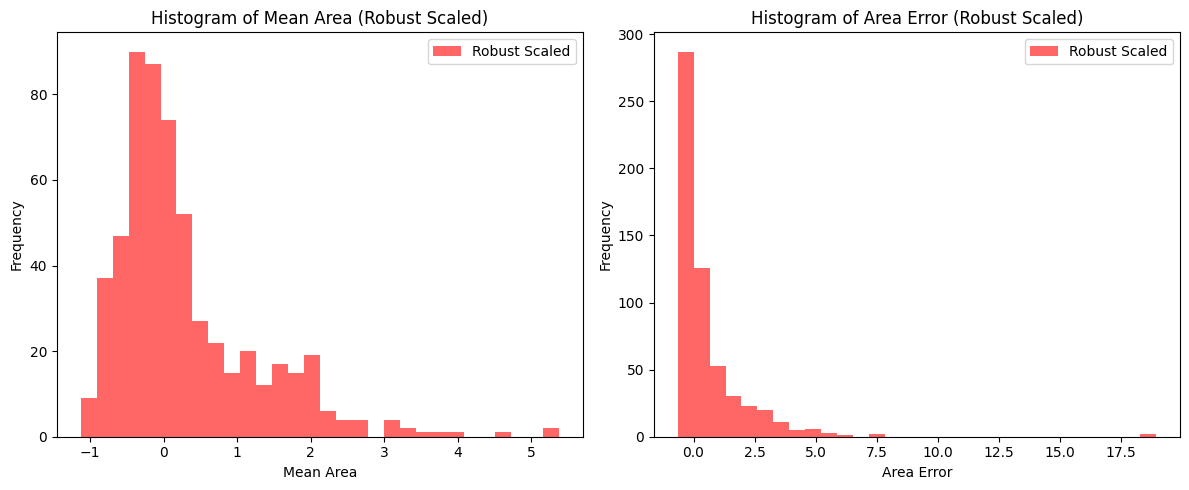

In [26]:
# 3. Robust Scaling
scaler = RobustScaler()
X_robust = scaler.fit_transform(features_selected)

# Correct DataFrame creation
X_robust = pd.DataFrame(X_robust, columns=['mean area', 'area error'])

# Plot histograms
plt.figure(figsize=(12,5))

# Histogram of Mean Area
plt.subplot(1, 2, 1)
plt.hist(X_robust['mean area'], bins=30, alpha=0.6, label='Robust Scaled', color='red')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Area (Robust Scaled)')
plt.legend()

# Histogram of Area Error
plt.subplot(1, 2, 2)
plt.hist(X_robust['area error'], bins=30, alpha=0.6, label='Robust Scaled', color='red')
plt.xlabel('Area Error')
plt.ylabel('Frequency')
plt.title('Histogram of Area Error (Robust Scaled)')
plt.legend()

plt.tight_layout()
plt.show()

##### Power Transformer

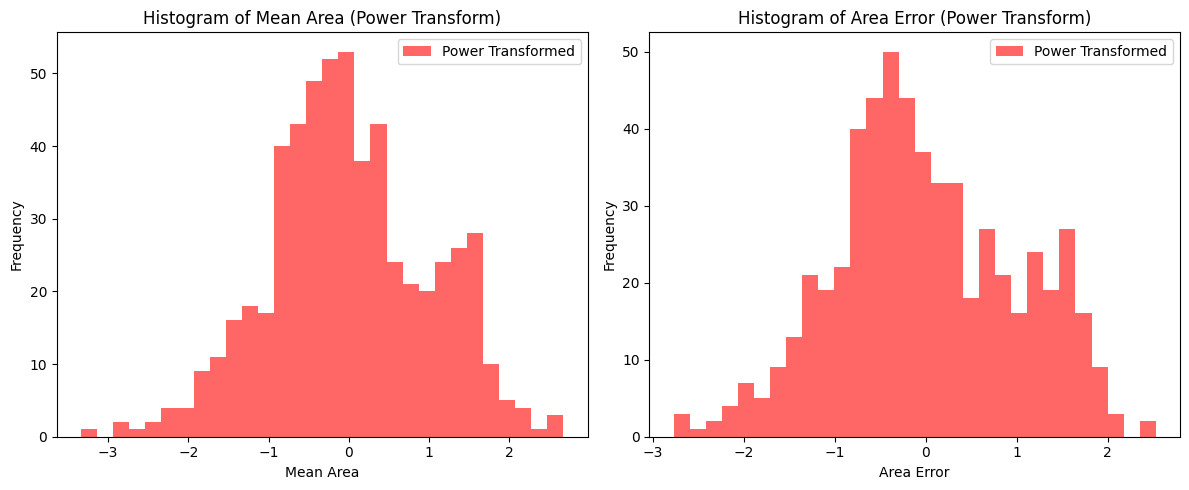

In [28]:
# 4. Power Transform (Yeo-Johnson)
scaler = PowerTransformer(method='yeo-johnson')
X_power = scaler.fit_transform(features_selected)

# Correct DataFrame creation
X_power = pd.DataFrame(X_power, columns=['mean area', 'area error'])

# Plot histograms
plt.figure(figsize=(12,5))

# Histogram of Mean Area
plt.subplot(1, 2, 1)
plt.hist(X_power['mean area'], bins=30, alpha=0.6, label='Power Transformed', color='red')
plt.xlabel('Mean Area')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Area (Power Transform)')
plt.legend()

# Histogram of Area Error
plt.subplot(1, 2, 2)
plt.hist(X_power['area error'], bins=30, alpha=0.6, label='Power Transformed', color='red')
plt.xlabel('Area Error')
plt.ylabel('Frequency')
plt.title('Histogram of Area Error (Power Transform)')
plt.legend()

plt.tight_layout()
plt.show()


#### Comparison of Normalization Methods and Their Impact on Outliers

---

##### 1. Min-Max Scaling (`MinMaxScaler`)
- **How it works:** Scales features to a fixed range, usually [0,1].
  \[
  X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
  \]
- **Impact on data:**
  - Preserves the shape of the original distribution.
  - All features are scaled proportionally.
- **Impact on outliers:**
  - Outliers are **not robustly handled**; extreme values compress the scale for normal points.
  - Example: One huge outlier makes most of the other data points squeezed near 0.
- **Best use:** When data has a known range and few outliers.

##### 2. Standard Scaling (`StandardScaler`)
- **How it works:** Centers data to mean 0 and scales by standard deviation (unit variance).
  \[
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  \]
- **Impact on data:**
  - Makes features comparable in terms of variance.
  - Preserves distribution shape but centers it.
- **Impact on outliers:**
  - Sensitive to outliers because the mean and standard deviation are affected.
  - Extreme points can stretch the scale.
- **Best use:** When algorithms assume normally distributed data (e.g., PCA, logistic regression).

##### 3. Robust Scaling (`RobustScaler`)
- **How it works:** Uses median and interquartile range (IQR) instead of mean and standard deviation.
  \[
  X_{\text{scaled}} = \frac{X - \text{median}}{\text{IQR}}
  \]
- **Impact on data:**
  - Less sensitive to extreme values.
  - Centers the median at 0 and scales based on spread of middle 50% of data.
- **Impact on outliers:**
  - Very robust; outliers have minimal influence.
- **Best use:** When data has **significant outliers** or heavy-tailed distributions.

##### 4. Power Transform (`PowerTransformer`)
- **How it works:** Applies a power function to make data more Gaussian-like (reduces skewness).
  - **Yeo-Johnson:** works with positive & negative values.
  - **Box-Cox:** works with strictly positive values.
- **Impact on data:**
  - Changes the shape of distribution, not just scale.
  - Reduces skewness, stabilizes variance.
- **Impact on outliers:**
  - Compresses extreme values, making outliers **less extreme**.
  - Still keeps the relative order of data points.
- **Best use:** When you want **normal-like data** for algorithms sensitive to distribution (e.g., linear regression, PCA, clustering).

---

##### Summary 

| Method | Effect on Scale | Effect on Distribution | Robust to Outliers? |
|--------|----------------|----------------------|-------------------|
| Min-Max | [0,1] scaling | Preserves shape | No |
| Standard | Mean=0, SD=1 | Preserves shape | No |
| Robust | Median=0, scaled by IQR | Preserves shape | Yes |
| Power Transform | Changes shape toward Gaussian | Reduces skew | Moderate (reduces extreme impact) |

---

##### Interpretation
- Min-Max Scaling: Good for bounded data and visualization but very sensitive to outliers.  
- Standard Scaling: Useful for algorithms requiring zero mean/unit variance but still affected by extreme values.  
- Robust Scaling: Ideal for datasets with outliers; median & IQR prevent extreme values from distorting scaling.  
- Power Transform: Good for skewed distributions; also reduces the impact of outliers, but may not fully eliminate them.


